In [5]:
# - 웹 브라우저를 조작..
# - 웹 브라우저에 보이는 HTML 태그속에서 
# - 텍스트 데이터를 분리해서 가지고 오는 
# selenium 설치명령 : conda install -c conda-forge selenium
# conda install로 설치가 안돠면 : pip install selenium
from selenium import webdriver

In [6]:
# 구글 드라이버 다운로드 하기
# https://sites.google.com/a/chromium.org/chromedriver/downloads

In [7]:
driver = webdriver.Chrome("C:/ChromeDriver/chromedriver.exe")

C:\Users\admin\AppData\Local\Temp/ipykernel_14892/1864857770.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/ChromeDriver/chromedriver.exe")


In [8]:
# 웹 url로 접근하기
url = "https://www.naver.com"
driver.get(url)

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url
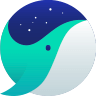
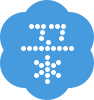

In [5]:
html = driver.page_source
html

### html 예시

In [6]:
# html 형태
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>

SyntaxError: invalid syntax (Temp/ipykernel_14484/1737875438.py, line 2)

In [7]:
html = '''
        <html>
            <head>
            </head>
            <body>
                <h1> 우리동네시장</h1>
                    <div class = 'sale'>
                        <p id='fruits1' class='fruits'>
                            <span class = 'name'> 바나나 </span>
                            <span class = 'price'> 3000원 </span>
                            <span class = 'inventory'> 500개 </span>
                            <span class = 'store'> 가나다상회 </span>
                            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                        </p>
                    </div>
                    <div class = 'prepare'>
                        <p id='fruits2' class='fruits'>
                            <span class ='name'> 파인애플 </span>
                        </p>
                    </div>
            </body>
        </html>

'''

In [8]:
#html을 문자형으로 뽑은 것
html

"\n        <html>\n            <head>\n            </head>\n            <body>\n                <h1> 우리동네시장</h1>\n                    <div class = 'sale'>\n                        <p id='fruits1' class='fruits'>\n                            <span class = 'name'> 바나나 </span>\n                            <span class = 'price'> 3000원 </span>\n                            <span class = 'inventory'> 500개 </span>\n                            <span class = 'store'> 가나다상회 </span>\n                            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>\n                        </p>\n                    </div>\n                    <div class = 'prepare'>\n                        <p id='fruits2' class='fruits'>\n                            <span class ='name'> 파인애플 </span>\n                        </p>\n                    </div>\n            </body>\n        </html>\n\n"

## 웹에 접근하는 방법

In [9]:
from bs4 import BeautifulSoup

In [10]:
# html.parser
# 문자열 형태의 html문서를 실제 html 형식으로 전환
soup = BeautifulSoup(html, "html.parser")

In [11]:
soup


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

In [12]:
# soup에서 span 태그 이름이 있는것들 모두 추출
tags_span = soup.select("span")

In [13]:
tags_span

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [14]:
tags_p = soup.select("p")

In [15]:
# class -> .(class)
# id접속 -> #(아이디) 아이디는 고유한 값
soup.select("#fruits1") # 아이디 fruits1인 태그 찾아라

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [16]:
# class 속성 컨트롤할 때 점(.)을 사용합니다
# 같은 값 여러개 있을 수 있다.
soup.select(".price")

[<span class="price"> 3000원 </span>]

In [17]:
# span태그 중 name이름인것들 추출
tag = soup.select("span.name")


In [18]:
#태그 구조 중 자식/자손 의미를 부여하는 기호
# 자식 : 직계(>)
# 자손 : 내밑으로 전체( )띄어쓰기

soup.select("#fruits1 > span.name")

[<span class="name"> 바나나 </span>]

In [19]:
# div 태그의 클래스 속성의 이름이 sale인 자식 중에
# id의 이름이 fruits1인 태그의 자식을 찾아서
# span 태그의 클래스 속성이 name인 태그를 조회해주세요

soup.select("div.sale>#fruits1>.name")

[<span class="name"> 바나나 </span>]

In [20]:
# div 태그의 클래스이름이 sale인 태그의 자손들 중
# span 이라는 태그의 클래스 속성중 name인 태그를 조회

soup.select("div.sale span.name")

[<span class="name"> 바나나 </span>]

In [21]:
tag[0]

<span class="name"> 바나나 </span>

In [22]:
tag[1]

<span class="name"> 파인애플 </span>

In [23]:
for i in range(0,len(tag)):
    print(tag[i])

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


In [24]:
tag[1] #파인애플만 뽑아내려면
tag[1].text

' 파인애플 '

In [25]:
for i in tag:
    print(i)
    
tag

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [26]:
# a태그 사용하기.. 링크값을 가지고 있다

tags = soup.select("a")

In [27]:
tag = tags[0]
tag.text

' 홈페이지 '

In [28]:
# href(자바스크립트 속해있다) : 링크를 담을수 있는 그릇이라 생각
tag["href"]

'http://bit.ly/forPlaywithData'

# 멜론 노래 순위 정보 클로링

In [9]:
from selenium import webdriver

In [10]:
driver = webdriver.Chrome("c://ChromeDriver/chromedriver.exe")

C:\Users\admin\AppData\Local\Temp/ipykernel_14892/4247477074.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("c://ChromeDriver/chromedriver.exe")


In [11]:
url = "http://www.melon.com/chart/index.htm"
driver.get(url) #가져와달라

In [12]:
html = driver.page_source #가져온 페이지 내 소스를 줘

In [13]:
html

'<html lang="ko" class="narrow-screen"><head>\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;TOP100&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b">\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.com/char

## html 포맷으로 변경하기

In [62]:
soup = BeautifulSoup(html, "html.parser")

In [63]:
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" pr

In [64]:
songs = soup.select("tr")

In [65]:
songs = songs[1:len(songs)]
len(songs)


100

In [66]:
songs[0].select("div.rank01 >span>a")[0].text




'INVU'

## 한세트 리스트 처리한다음 나머지 for문 돌려서 합치기

In [106]:
song = songs[0]
# 노래제목 추출
song.select("div.rank01>span>a")[0].text

# 가수 추출
song.select("div.rank02>a")[0].text


'태연 (TAEYEON)'

In [68]:
# song에 a태그 추출
song.select("a")


[<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10863559');" title="INVU - The 3rd Album">
 <img alt="INVU - The 3rd Album - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/108/63/559/10863559_20220214160739_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>,
 <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('34626109');" title="INVU 곡정보"><span class="none">곡정보</span></a>,
 <a href="javascript:melon.play.playSong('1000002721',34626109);" title="INVU 재생">INVU</a>,
 <a href="javascript:melon.link.goArtistDetail('236797');" title="태연 (TAEYEON) - 페이지 이동">태연 (TAEYEON)</a>,
 <a href="javascript:melon.link.goArtistDetail('236797');" title="태연 (TAEYEON) - 페이지 이동">태연 (TAEYEON)</a>,
 <a href="javascript:melon.link.goAlbumDetail('10863559');" title="INVU - The 3rd Album - 페이지 이동">INVU - The 3rd Album</a>]

In [112]:
for i in range(0,len(songs)):
    song = songs[i]
    
    # 노래제목 추출
    song_title = song.select("div.rank01>span>a")[0].text
    
    # 가수 추출
    song_singer = song.select("div.rank02>a")[0].text
    
    print("[{}순위] ".format(i+1) + song_singer + "-" + song_title)

    
    
    

[1순위] 태연 (TAEYEON)-INVU
[2순위] 임영웅-사랑은 늘 도망가
[3순위] 김민석 (멜로망스)-취중고백
[4순위] MSG워너비(M.O.M)-듣고 싶을까
[5순위] 케이시 (Kassy)-언제나 사랑해
[6순위] STAYC(스테이씨)-RUN2U
[7순위] GAYLE-abcdefu
[8순위] IVE (아이브)-ELEVEN
[9순위] 휘인 (Whee In)-너, 너 (N번째 연애 X 휘인 (Whee In))
[10순위] YENA (최예나)-SMILEY (Feat. BIBI)
[11순위] GOT the beat-Step Back
[12순위] sokodomo-회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)
[13순위] 경서예지-다정히 내 이름을 부르면
[14순위] BE'O (비오)-리무진 (Feat. MINO) (Prod. GRAY)
[15순위] 탑현-호랑수월가
[16순위] 임영웅-이제 나만 믿어요
[17순위] 이무진-눈이 오잖아(Feat.헤이즈)
[18순위] The Kid LAROI-STAY
[19순위] 이무진-신호등
[20순위] BE'O (비오)-Counting Stars (Feat. Beenzino)
[21순위] aespa-Dreams Come True
[22순위] aespa-Next Level
[23순위] 폴킴-어제처럼
[24순위] 아이유-strawberry moon
[25순위] 임영웅-다시 사랑한다면 (김필 Ver.)
[26순위] 임영웅-그대라는 사치
[27순위] 노을-잊을 수 있을까
[28순위] 아이유-드라마
[29순위] 임영웅-별빛 같은 나의 사랑아
[30순위] 태연 (TAEYEON)-Can't Control Myself
[31순위] 태연 (TAEYEON)-Weekend
[32순위] 멜로망스-사랑인가 봐
[33순위] aespa-Savage
[34순위] 임영웅-잊었니
[35순위] 아이유-겨울잠
[36순위] 임영웅-HERO
[37순위] 방탄소년단-Butter
[38순위] 베이식 (Basick)-만남은 쉽고 이별은 어려워 (Fe

## songs로  for문 돌려 한번에 나타내기

In [97]:
songs[0].select("div.rank01>span>a")[0].text

'INVU'

In [92]:
songs[0].select("div.rank02>span>a")[0].text

'태연 (TAEYEON)'

In [45]:
for i in range(0, len(songs)):
    # 노래제목
    title = songs[i].select("div.rank01 >span>a")[0].text
    
    # 가수
    singer = songs[i].select("div.rank02 >span>a")[0].text
    
    
    
    print( "[{}순위]".format(i+1) + title + "-" + singer)
    
    
    
    

[1순위]INVU-태연 (TAEYEON)
[2순위]사랑은 늘 도망가-임영웅
[3순위]취중고백-김민석 (멜로망스)
[4순위]듣고 싶을까-MSG워너비(M.O.M)
[5순위]언제나 사랑해-케이시 (Kassy)
[6순위]RUN2U-STAYC(스테이씨)
[7순위]abcdefu-GAYLE
[8순위]ELEVEN-IVE (아이브)
[9순위]너, 너 (N번째 연애 X 휘인 (Whee In))-휘인 (Whee In)
[10순위]SMILEY (Feat. BIBI)-YENA (최예나)
[11순위]Step Back-GOT the beat
[12순위]회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)-sokodomo
[13순위]다정히 내 이름을 부르면-경서예지
[14순위]리무진 (Feat. MINO) (Prod. GRAY)-BE'O (비오)
[15순위]호랑수월가-탑현
[16순위]이제 나만 믿어요-임영웅
[17순위]눈이 오잖아(Feat.헤이즈)-이무진
[18순위]STAY-The Kid LAROI
[19순위]신호등-이무진
[20순위]Counting Stars (Feat. Beenzino)-BE'O (비오)
[21순위]Dreams Come True-aespa
[22순위]Next Level-aespa
[23순위]어제처럼-폴킴
[24순위]strawberry moon-아이유
[25순위]다시 사랑한다면 (김필 Ver.)-임영웅
[26순위]그대라는 사치-임영웅
[27순위]잊을 수 있을까-노을
[28순위]드라마-아이유
[29순위]별빛 같은 나의 사랑아-임영웅
[30순위]Can't Control Myself-태연 (TAEYEON)
[31순위]Weekend-태연 (TAEYEON)
[32순위]사랑인가 봐-멜로망스
[33순위]Savage-aespa
[34순위]잊었니-임영웅
[35순위]겨울잠-아이유
[36순위]HERO-임영웅
[37순위]Butter-방탄소년단
[38순위]만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)-베이식 (Basick)
[39순위]끝사랑

# 웹 크롤링 방식 2가지

## 1. BeautifulSoup 방식

In [50]:
# 1. BeautifulSoup 방식
driver = webdriver.Chrome("c:/ChromeDriver/chromedriver.exe")

url = "http://www.melon.com/chart/index.htm"
driver.get(url)

html = driver.page_source

# 이하 부분이 BeautifulSoup 방식 적용
# select() 함수 이용하여 태그 정보 가지고옴.
soup = BeautifulSoup(html, "html.parser")

# 순위 10개 뽑기

songs = soup.select("tr")[1:11]

for i in range(0, len(songs)):
    # 노래제목
    title = songs[i].select("div.rank01 >span>a")[0].text
    
    # 가수
    singer = songs[i].select("div.rank02 >a")[0].text
    
    
    
    print( "[{}순위]".format(i+1) + singer + "-" + title)
    



C:\Users\admin\AppData\Local\Temp/ipykernel_14484/2157575045.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("c:/ChromeDriver/chromedriver.exe")


[1순위]태연 (TAEYEON)-INVU
[2순위]임영웅-사랑은 늘 도망가
[3순위]김민석 (멜로망스)-취중고백
[4순위]MSG워너비(M.O.M)-듣고 싶을까
[5순위]케이시 (Kassy)-언제나 사랑해
[6순위]STAYC(스테이씨)-RUN2U
[7순위]GAYLE-abcdefu
[8순위]IVE (아이브)-ELEVEN
[9순위]휘인 (Whee In)-너, 너 (N번째 연애 X 휘인 (Whee In))
[10순위]YENA (최예나)-SMILEY (Feat. BIBI)


## 2. selenium 방식

In [51]:
# 1. BeautifulSoup 방식
driver = webdriver.Chrome("c:/ChromeDriver/chromedriver.exe")

url = "http://www.melon.com/chart/index.htm"
driver.get(url)

#html = driver.page_source

# 이하 부분이 BeautifulSoup 방식 적용
# select() 함수 이용하여 태그 정보 가지고옴.
#soup = BeautifulSoup(html, "html.parser")




# selenum 방식 시작...
# find_elements_by_css_selector() 함수 사용
# 순위 10개 뽑기
songs = driver.find_elements_by_css_selector("tr")[1:11]

for i in range(0, len(songs)):
    # 노래제목
    title = songs[i].find_elements_by_css_selector("div.rank01 >span>a")[0].text
    
    # 가수
    singer = songs[i].find_elements_by_css_selector("div.rank02 >a")[0].text
    
    
    
    print( "[{}순위]".format(i+1) + singer + "-" + title)
    



C:\Users\admin\AppData\Local\Temp/ipykernel_14484/2508848589.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("c:/ChromeDriver/chromedriver.exe")
C:\Users\admin\AppData\Local\Temp/ipykernel_14484/2508848589.py:19: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  songs = driver.find_elements_by_css_selector("tr")[1:11]


[1순위]태연 (TAEYEON)-INVU
[2순위]임영웅-사랑은 늘 도망가
[3순위]김민석 (멜로망스)-취중고백
[4순위]MSG워너비(M.O.M)-듣고 싶을까
[5순위]케이시 (Kassy)-언제나 사랑해
[6순위]STAYC(스테이씨)-RUN2U
[7순위]GAYLE-abcdefu
[8순위]IVE (아이브)-ELEVEN
[9순위]휘인 (Whee In)-너, 너 (N번째 연애 X 휘인 (Whee In))
[10순위]YENA (최예나)-SMILEY (Feat. BIBI)
